In [3]:
import os
import ee
import geemap
from geemap.datasets import DATA, get_metadata
#ee.Authenticate()
#ee.Initialize()

In [4]:
DATA.JCU_Murray_GIC_global_tidal_wetland_change_2019
DATA.JCU
get_metadata(DATA.JCU_Murray_GIC_global_tidal_wetland_change_2019)

HTML(value='\n            <html>\n            <body>\n                <h3>Murray Global Tidal Wetland Change v…

In [5]:

Map = geemap.Map(center=[10, 40], zoom=3)


In [7]:
# Define the region of interest
aoi = ee.Geometry.Polygon(
    [[[-23.196328877875377, 25.426571732673924],
      [-23.196328877875377, -45.380577059318085],
      [81.92085862212463, -45.380577059318085],
      [81.92085862212463, 25.426571732673924]]], None, False)

In [8]:
#set output directory
out_dir=os.path.expanduser('C:/Users/pichaya/wiosym/data/reg/eco/ch_mudflat/v01/proc')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [9]:
# Load the Earth Engine datasets
Int2002_2004 = ee.Image('UQ/murray/Intertidal/v1_1/global_intertidal/2002-2004').clip(aoi)
Int2011_2013 = ee.Image('UQ/murray/Intertidal/v1_1/global_intertidal/2011-2013').clip(aoi)
Int2014_2016 = ee.Image('UQ/murray/Intertidal/v1_1/global_intertidal/2014-2016').clip(aoi)

# Create an image collection from the datasets
collection = ee.ImageCollection([Int2002_2004, Int2011_2013, Int2014_2016])

# Mosaic the images in the collection
mosaic = collection.mosaic()



In [10]:
# Export the image to Google Cloud Storage

# INSERT YOUR PROJECT HERE!
#PROJECT = 'melody-336508'

# Define the output path and file name for the exported file on Google Cloud Storage

#out_dir = 'gs://wiosym'
#file_name = 'intertidal_mosaic.tif'
# INSERT YOUR BUCKET HERE!
bucket = 'pichaya'
geemap.ee_export_image_to_cloud_storage(mosaic, description='intertidal_mosaic', bucket=bucket, region=aoi, scale=30, maxPixels=10000000000000)



#export data to local computer
#out_raster = os.path.join(os.path.expanduser('~'),'proc')
#file_name = os.path.join(out_dir,'intertidal_mosaic.tif')
#geemap.ee_export_image(mosaic,filename=file_name, scale=100, region=aoi, file_per_band=False)


In [22]:
# Create a geemap interactive map
Map = geemap.Map(center=[0, 0], zoom=4)

viz_params = {
    'min': 0,
    'max': 1,
    'palette': ['black', 'green']
}

viz = {
    'min': 0,
    'max': 1,
    'palette': ['black', 'red']
}
viz2 = {
    'min': 0,
    'max': 1,
    'palette': ['black', 'yellow']
}
viz3 = {
    'min': 0,
    'max': 1,
    'palette': ['black', 'blue']
}

# Add the mosaic layer to the map
Map = geemap.Map(center=[10, 40], zoom=5)
Map.addLayer(mosaic, viz_params, 'Mosaic')
Map.addLayer(Int2002_2004, viz, 'Int2002_2004')
Map.addLayer(Int2011_2013, viz2, 'Int2011_2013')
Map.addLayer(Int2014_2016, viz3, 'Int2014_2016')
Map


Map(center=[10, 40], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…

In [23]:
import glob
import rasterio
from rasterio.merge import merge
import matplotlib.pyplot as plt


C:/Users/pichaya/wiosym/data/reg/eco/ch_mudflat/v01/proc\intertidal_mosaic.tif


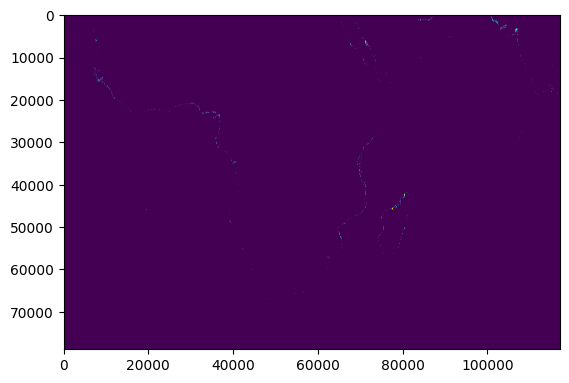

C:/Users/pichaya/wiosym/data/reg/eco/ch_mudflat/v01/proc\intertidal_mosaic0000000000-0000000000.tif


In [24]:
# Define the directory path
dir_path = 'C:/Users/pichaya/wiosym/data/reg/eco/ch_mudflat/v01/proc/'

# Get a list of all .tif files in the directory
tif_files = glob.glob(dir_path + '*.tif')
# Loop through each file and plot the raster data
for file in tif_files:
    # Open the raster file
    with rasterio.open(file) as src:
        # Read the raster data as a numpy array
        raster_data = src.read(1)
        print(file)
        # Define the plot parameters
        cmap = 'viridis'
        vmin, vmax = raster_data.min(), raster_data.max()

        # Plot the raster
        plt.imshow(raster_data, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.show()


In [1]:
# Open all the raster files and read their metadata
src_files_to_mosaic = []
for file in tif_files:
    src = rasterio.open(file)
    src_files_to_mosaic.append(src)
    
# Mosaic the raster files together
mosaic, out_trans = merge(src_files_to_mosaic)

# Copy the metadata of the first raster
out_meta = src_files_to_mosaic[0].meta.copy()
out_meta.update({"driver": "GTiff",
                  "height": mosaic.shape[1],
                  "width": mosaic.shape[2],
                  "transform": out_trans})

# Write the output raster to a new GeoTIFF file
with rasterio.open("C:/Users/pichaya/wiosym/data/reg/eco/ch_mudflat/v01/proc/intertidal_mosaic.tif", "w", **out_meta) as dest:
    dest.write(mosaic)


# Open the new raster file and read the raster data as a numpy array
with rasterio.open("C:/Users/pichaya/wiosym/data/reg/eco/ch_mudflat/v01/proc/intertidal_mosaic.tif") as src:
    raster_data = src.read(1)

# Define the plot parameters
cmap = 'viridis'
vmin, vmax = raster_data.min(), raster_data.max()

# Plot the raster
plt.imshow(raster_data, cmap=cmap, vmin=vmin, vmax=vmax)
plt.show()

NameError: name 'tif_files' is not defined